## csvファイルをグラフ化する
---
* モジュールをインポートする
* 初回の実行では時間がかかる
  * `!pip install japanize-matplotlib` の実行が理由

In [1]:
#      file.       :plotCsv.ipynb
#      author.     :k.ishizeki
#      Revision.   :2021/10/07

%matplotlib inline
%pip install japanize-matplotlib    #グラフのラベルに日本語を使うため
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import csv
import os
from scipy.optimize import curve_fit
import random

#カレントディレクトリを取得する
cwd = os.getcwd()

#画像ファイルを保存するディレクトリ
dir_fig = '/fig'
os.makedirs(cwd + dir_fig, exist_ok=True)

Note: you may need to restart the kernel to use updated packages.


## グラフの書式設定
* 細かいことはコード内のコメントへ

In [2]:
#グラフを表示する画像の設定
plt.rcParams['figure.figsize'] = [9, 5]   #画像サイズは 9[Inch]*5[Inch]
plt.rcParams['figure.dpi']      = 100    #100 [dpi] (Dot per Inch)
plt.rcParams['figure.facecolor']  = 'w'   #画像の背景の色は白
plt.rcParams['figure.edgecolor'] = 'w'   #画像の枠線は白

#目盛りの設定
plt.rcParams['xtick.direction'] = 'in'        #x軸の目盛り線は内向き
plt.rcParams['ytick.direction'] = 'in'        #y軸の目盛線は内向き
plt.rcParams['xtick.top'] = True           #上部に目盛り線を描く
plt.rcParams['ytick.right'] = True          #右部に目盛り線を描く
plt.rcParams['xtick.major.size'] = 8.0      #x軸主目盛り線の長さ
plt.rcParams['ytick.major.size'] = 8.0      #y軸主目盛り線の長さ
plt.rcParams['xtick.minor.visible'] = True   #x軸の副目盛り線を描く
plt.rcParams['ytick.minor.visible'] = True   #y軸の副目盛り線を描く
plt.rcParams['xtick.minor.size'] = 4.0       #x軸副目盛り線の長さ
plt.rcParams['ytick.minor.size'] = 4.0       #y軸副目盛り線の長さ

#グリッドの設定
plt.rcParams['axes.grid']  = True        #グリッド線を表示する
plt.rcParams['axes.axisbelow'] = True   #グリッド線を最背面に移動する(指定しないとグラフの点と重なって見えにくい)

#凡例の設定
plt.rcParams['legend.loc'] = 'best'           #凡例の位置を指定。'best'で最適な場所に配置される
plt.rcParams['legend.frameon'] = True       #凡例を枠で囲う
plt.rcParams['legend.framealpha'] = 1.0     #透過度を指定。1.0で透過率0%


## ランダムウォーク

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<ipython-input-22-676b8b0fddc0>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  record = pd.Series()


     index    00    01  02  03  04  05  06  07  08  09
0      0.0   1.0   0.0 NaN NaN NaN NaN NaN NaN NaN NaN
1      1.0   0.0  -1.0 NaN NaN NaN NaN NaN NaN NaN NaN
2      2.0  -1.0   0.0 NaN NaN NaN NaN NaN NaN NaN NaN
3      3.0   0.0  -1.0 NaN NaN NaN NaN NaN NaN NaN NaN
4      4.0  -1.0  -2.0 NaN NaN NaN NaN NaN NaN NaN NaN
..     ...   ...   ...  ..  ..  ..  ..  ..  ..  ..  ..
995  995.0 -32.0  25.0 NaN NaN NaN NaN NaN NaN NaN NaN
996  996.0 -31.0  26.0 NaN NaN NaN NaN NaN NaN NaN NaN
997  997.0 -32.0  27.0 NaN NaN NaN NaN NaN NaN NaN NaN
998  998.0 -31.0  26.0 NaN NaN NaN NaN NaN NaN NaN NaN
999  999.0 -32.0  27.0 NaN NaN NaN NaN NaN NaN NaN NaN

[1000 rows x 11 columns]


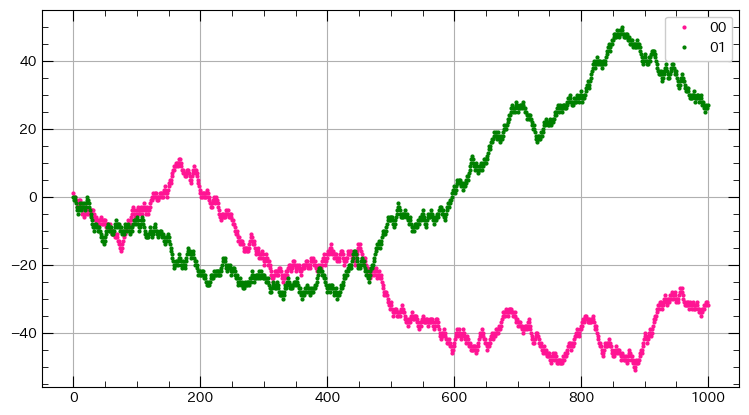

In [22]:
TRIAL_NUM = 1000

#変数、配列の用意
buf = 0
xdata = np.arange(10)
column = xdata.tolist()
str(column)
print(column)
df = pd.DataFrame(columns = ["index", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09"])

for i in range(TRIAL_NUM):
  for j in range(10):
    #乱数の準備
    #0から1の間の整数を返す
    buf = random.randint(0, 1)

    if buf == 0:
      xdata[j] += 1
    else:
      xdata[j] -= 1
    
  df = df.append({"index": i, "00": xdata[0], "01":xdata[1]}, ignore_index=True)

print(df)

#プロットする
plt.plot(df["index"], df["00"], color='deeppink',linestyle='None', marker="o", markersize="2", label='00')
plt.plot(df["index"], df["01"], color='green',linestyle='None', marker="o", markersize="2", label='01')
plt.legend()
plt.show()







